# **Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 






# **Business Objective**

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# **Step 1: Reading and Understanding the data**

In [486]:
#import libraries
import pandas as pd
import numpy as np

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [487]:
#read the csv file
dayDF = pd.read_csv('day.csv')
dayDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [488]:
#check the structure of the dataset
dayDF.shape

(730, 16)

In [489]:
#check for null values and datatypes
dayDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


-> There are no null values in the dataset.

-> The date column is of type object, we need to convert this.

In [490]:
#check basic statistics of the numerical columns
dayDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# **Step 2: Visualizing the data and understanding correlations**

In [491]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [492]:
dayDF.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [493]:
#derving new variable
dayDF['day'] = pd.DatetimeIndex(dayDF['dteday']).day
dayDF['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [494]:
#columns to drop
irr_col = ['instant','dteday','casual','registered']

Dropping these columns as,

-> instant column is a record index.

-> dteday column has all the information dervied from it through other columns. 

-> causual and registered columns are added up to get cnt variable, which is our target variable. 


In [495]:
dayDF.drop(irr_col,axis=1,inplace=True)

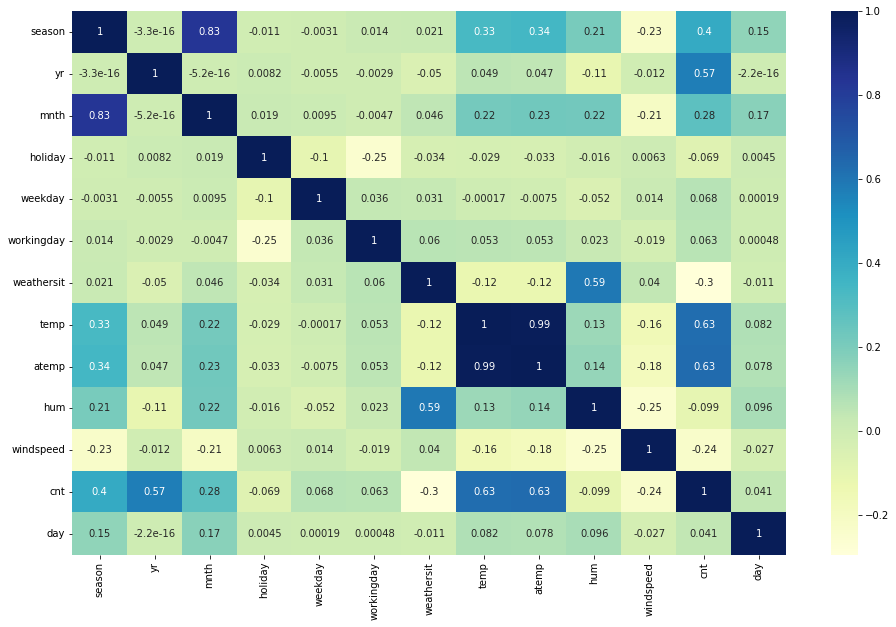

In [496]:
#let's look at the quantitative correlation
plt.figure(figsize=(16,10))
sns.heatmap(dayDF.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [497]:
#dropping column atemp as it has high correlation of 99% with temp column
dayDF.drop(['atemp'], axis=1, inplace=True)

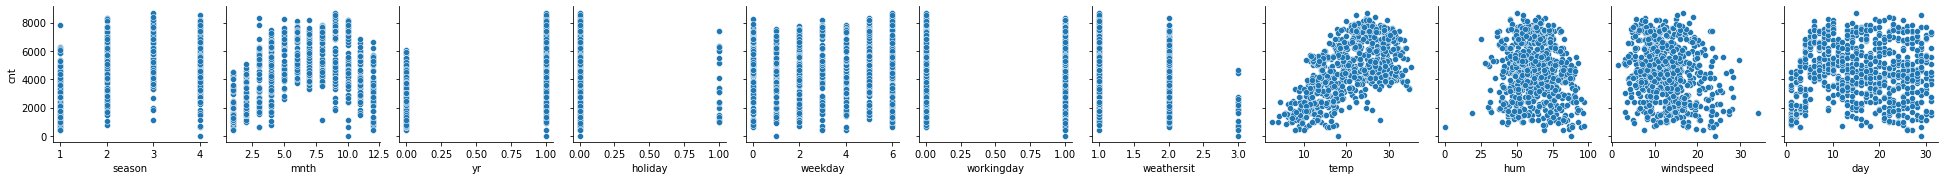

In [498]:
sns.pairplot(data=dayDF, y_vars=['cnt'], x_vars=['season', 'mnth', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed','day'])


-> Our target variable is cnt. And there seems to be linear correlation with temp variable amongst the continuous variables.

### **Univariate and Bivariate Analysis**

In [499]:
dayDF['season'].unique()

array([1, 2, 3, 4])

In [500]:
dayDF['season'] = dayDF['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

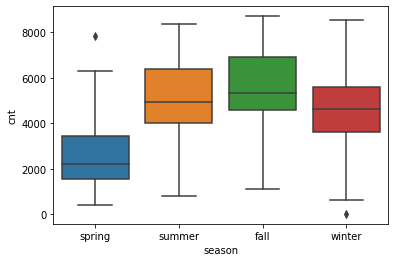

In [501]:
sns.boxplot(x='season',y='cnt',data=dayDF)

* Demand for bikes have been clearly low in spring compared to other seasons.

In [502]:
dayDF['mnth'] = dayDF['mnth'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June",
                                   7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

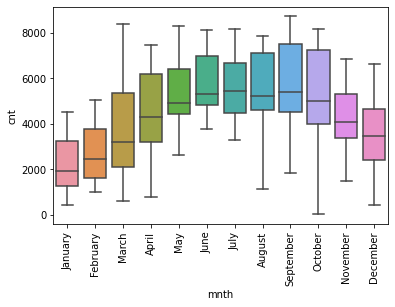

In [503]:
sns.boxplot(x='mnth',y='cnt',data=dayDF)
plt.xticks(rotation=90)
plt.show()

* More bikes have been rented out in mid months and fewer in the month of Jan, Feb and relatively Nov and Dec.

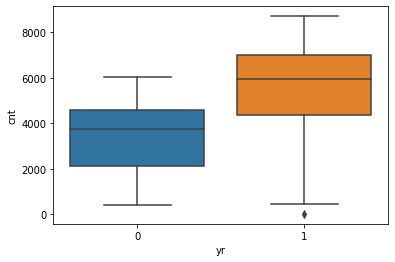

In [504]:
sns.boxplot(x='yr',y='cnt',data=dayDF)

* Clearly, the demand for bike rentals have increased from year 2018 to 2019.

In [505]:
data = dayDF['holiday'].value_counts()/len(dayDF) * 100
print(data)
labels = ['No','Yes']

0    97.123288
1     2.876712
Name: holiday, dtype: float64


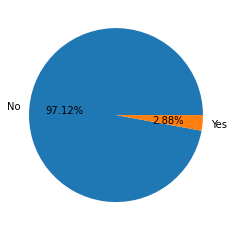

In [506]:
plt.pie(data, labels=labels, autopct='%.2f%%')
plt.show()

* Less than 3% of the total sample rented out bikes on holidays.

In [507]:
dayDF['weekday'] = dayDF['weekday'].map({0:"Tuesday", 1:"Wednesday", 2:"Thursday", 3:"Friday", 4:"Saturday", 
                                         5:"Sunday", 6:"Monday"})

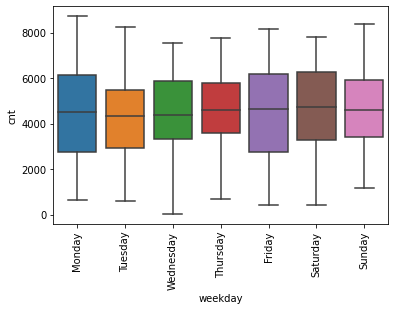

In [508]:
sns.boxplot(x='weekday',y='cnt',data=dayDF)
plt.xticks(rotation=90)
plt.show()

* No much tell from the weekday column. Average bikes rented out seems to be more or so the same for all days.

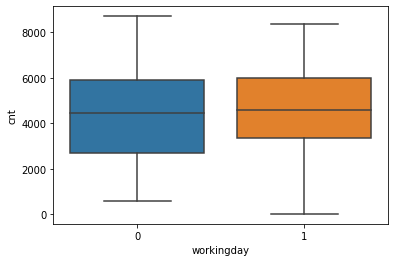

In [509]:
sns.boxplot(x='workingday',y='cnt',data=dayDF)

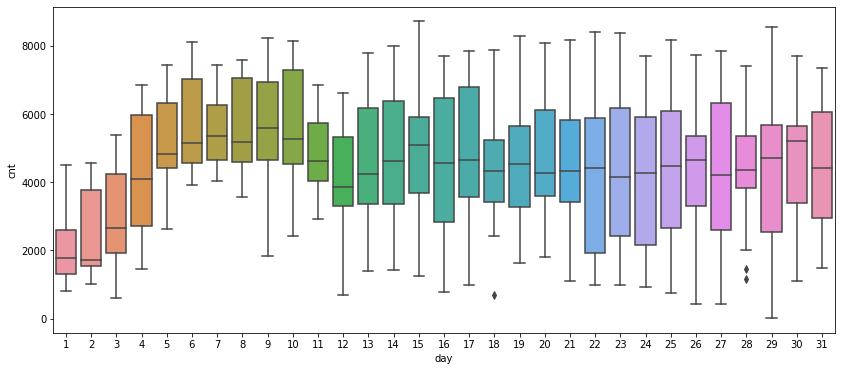

In [510]:
plt.figure(figsize=(14,6))
sns.boxplot(x='day',y='cnt',data=dayDF)
plt.show()

* Not much tell from the day variable as well, but beginning of the month has seen relatively less bike rentals.

In [511]:
dayDF['weathersit'] = dayDF['weathersit'].map({1:"cloudy", 2:"misty", 3:"lightrain", 4:"heavyrain"})

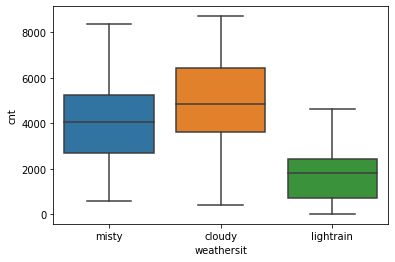

In [512]:
sns.boxplot(x='weathersit',y='cnt',data=dayDF)

* No rentals in heavy rain which is pretty intuitive. Less demand during light rain or snow. 

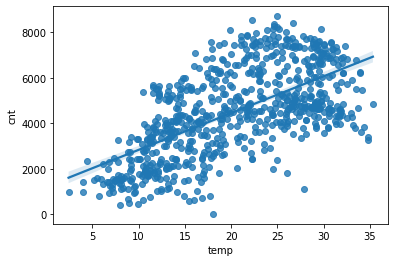

In [513]:
sns.regplot(x='temp',y='cnt',data=dayDF)

* temp variable displays a positive linear correlation with the target variable

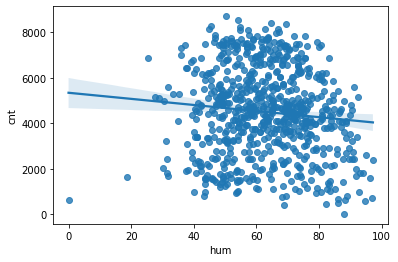

In [514]:
sns.regplot(x='hum',y='cnt',data=dayDF)

* There seems to be outliers in humidity feature. Ideal humidity levels are between 30-75 percent. So let's remove the outliers whose value is less than 30 and greater than 75.

In [515]:
dayDF[(dayDF['hum']<30) | (dayDF['hum']>75)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,spring,0,January,0,Monday,0,misty,14.110847,80.5833,10.749882,985,1
17,spring,0,January,0,Thursday,1,misty,8.883347,86.1667,9.833925,683,18
25,spring,0,January,0,Friday,1,lightrain,8.917500,86.2500,19.687950,506,26
27,spring,0,January,0,Sunday,1,misty,8.342598,79.3043,8.261100,1167,28
31,spring,0,February,0,Thursday,1,misty,7.879134,82.9565,3.565271,1360,2
...,...,...,...,...,...,...,...,...,...,...,...,...
714,winter,1,December,0,Tuesday,0,misty,14.862500,83.8750,6.749714,3786,16
715,winter,1,December,0,Wednesday,1,misty,16.126653,90.7083,6.583306,4585,17
722,spring,1,December,0,Wednesday,1,misty,9.483464,79.1304,5.174437,920,24
724,spring,1,December,0,Friday,1,lightrain,9.976653,82.3333,21.208582,441,26


In [516]:
dayDF = dayDF[(dayDF['hum']>=30) | (dayDF['hum']<=75)]

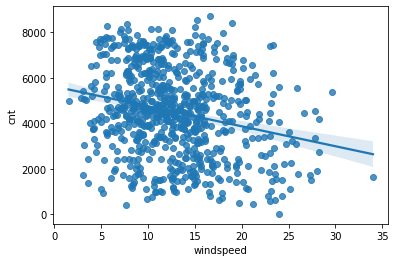

In [517]:
sns.regplot(x='windspeed',y='cnt',data=dayDF)

* windspeed displays a negative correlation with target variable cnt. So as the windspeed increases, the number of bikes rented out decreases.

# **Step 3: Preparing the data**
##### As part of this step, we will handle the categorical variables by creating dummy/indicator variables so that it can used in the model.

In [518]:
dayDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 74.1+ KB


In [519]:
#creating dummies for season variale
#drop_first is used as we don't need 4 variables to explain 4 levels, n-1 would be enough.
season_dummies = pd.get_dummies(dayDF['season'], drop_first = True)
print(dayDF['season'].head())
season_dummies.head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object


,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [520]:
#creating dummies for weathersit variale
weathersit_dummies = pd.get_dummies(dayDF['weathersit'], drop_first = True)
print(dayDF['weathersit'].head())
weathersit_dummies.head()

0     misty
1     misty
2    cloudy
3    cloudy
4    cloudy
Name: weathersit, dtype: object


,lightrain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [521]:
#creating dummies for mnth variale
month_dummies = pd.get_dummies(dayDF['mnth'], drop_first = True)
print(dayDF['mnth'].head())
month_dummies.head()

0    January
1    January
2    January
3    January
4    January
Name: mnth, dtype: object


,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [522]:
#creating dummies for weekday variale
weekday_dummies = pd.get_dummies(dayDF['weekday'], drop_first = True)
print(dayDF['weekday'].head())
weekday_dummies.head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: weekday, dtype: object


,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [523]:
#concatenating all dummy dataframes to original dataframe
dayDF = pd.concat([dayDF,season_dummies,weathersit_dummies,month_dummies,weekday_dummies],axis=1)

In [524]:
#let's drop the original categorical variables season,weathersit,mnth and weekday
dayDF.drop(['season','weathersit','mnth','weekday'],axis=1,inplace=True)

In [525]:
#let's drop day column since it doesn't give much insight
dayDF.drop(['day'],axis=1,inplace=True)

In [526]:
dayDF.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Step 4: Splitting the data and performing Feature Scaling**

In [527]:
#import libraries

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

In [528]:
df_train,df_test = train_test_split(dayDF, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


* Our train dataset has 510 datapoints and test dataset has 220 datapoints, with 29 variables.

In [529]:
scaler = MinMaxScaler()

dayDF.nunique()

yr              2
holiday         2
workingday      2
temp          498
hum           594
windspeed     649
cnt           695
spring          2
summer          2
winter          2
lightrain       2
misty           2
August          2
December        2
February        2
January         2
July            2
June            2
March           2
May             2
November        2
October         2
September       2
Monday          2
Saturday        2
Sunday          2
Thursday        2
Tuesday         2
Wednesday       2
dtype: int64

In [530]:
#consider variables whose values doesn't fall under fixed range of [0,1] for MinMaxScaler
scaled_col = ['temp','hum','windspeed','cnt']

df_train[scaled_col] = scaler.fit_transform(df_train[scaled_col])

In [531]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* The range of all variable values are between [0,1]. 

#### **Dividing dataset into X and y sets**

In [532]:
#pop() method will remove the column from dataframe & return it, used for separating dependent variable from independent variables
y_train = df_train.pop('cnt')
X_train = df_train

* So data is now clean and prepped to build the model.

# **Step 5: Building the model**

In [533]:
#import libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [534]:
#insantiating and fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

#running RFE on the model for feature selection
rfe = RFE(lm,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [535]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightrain', True, 1),
 ('misty', True, 1),
 ('August', False, 2),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 7),
 ('March', False, 9),
 ('May', True, 1),
 ('November', True, 1),
 ('October', False, 5),
 ('September', True, 1),
 ('Monday', True, 1),
 ('Saturday', False, 8),
 ('Sunday', False, 6),
 ('Thursday', False, 4),
 ('Tuesday', True, 1),
 ('Wednesday', False, 3)]

In [536]:
col_1 = X_train.columns[rfe.support_]
col_1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'lightrain', 'misty', 'December', 'February',
       'January', 'July', 'May', 'November', 'September', 'Monday', 'Tuesday'],
      dtype='object')


* Now that have our first set of features selected, let's build our model using statsmodels to get insight of detailed statistical parameters

#### **Using statsmodels to build the model**

In [537]:
#import libraries
import statsmodels.api as sm

In [538]:
#let's create our first model using RFE selected 10 features with rank 1
X_train_sm1 = sm.add_constant(X_train[col_1])

#create the model
lr_model1 = sm.OLS(y_train,X_train_sm1)

#fit the model
lr1 = lr_model1.fit()

In [539]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.20e-189
Time:                        16:11:04   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2475      0.030      8.194      0.000       0.188       0.307
yr             0.2318      0.008     29.103      0.000       0.216       0.247
holiday        0.0003      0.022      0.016      0.987      -0.042       0.043
workingday     0.0936      0.010      9.443      0.000       0.074       0.113
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
lightrain     -0.2549      0.026     -9.773      0.000      -0.306      -0.204
misty         -0.0583      0.010     -5.655      0.000      -0.079      -0.038
December      -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February      -0.0348      0.021     -1.626      0.105      -0.077       0.007
January       -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
November      -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September      0.0723      0.017      4.349      0.000       0.040       0.105
Monday         0.1040      0.012      8.744      0.000       0.081       0.127
Tuesday        0.0495      0.012      4.002      0.000       0.025       0.074
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                     9.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* p_value for holiday is 0.987 which is high, so let's drop this variable and rebuild the model

* R_squared value is 0.852, which means the model is able to explain 85.2% variance in the training data.

In [540]:
#dropping variable 'holiday'
col_2 = X_train[col_1].drop(['holiday'],axis=1).columns
X_train_sm2 = sm.add_constant(X_train[col_2])

#create the model
lr_model2 = sm.OLS(y_train,X_train_sm2)

#fit the model
lr2 = lr_model2.fit()

In [541]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.20e-189
Time:                        16:11:05   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2478      0.045      5.472      0.000       0.159       0.337
yr             0.2318      0.008     29.103      0.000       0.216       0.247
workingday     0.0933      0.025      3.679      0.000       0.043       0.143
temp           0.4527      0.038     11.846      0.000       0.378       0.528
hum           -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
spring        -0.0553      0.022     -2.528      0.012      -0.098      -0.012
summer         0.0295      0.017      1.747      0.081      -0.004       0.063
winter         0.1001      0.018      5.618      0.000       0.065       0.135
lightrain     -0.2549      0.026     -9.773      0.000      -0.306      -0.204
misty         -0.0583      0.010     -5.655      0.000      -0.079      -0.038
December      -0.0488      0.018     -2.692      0.007      -0.084      -0.013
February      -0.0348      0.021     -1.626      0.105      -0.077       0.007
January       -0.0650      0.021     -3.067      0.002      -0.107      -0.023
July          -0.0510      0.018     -2.844      0.005      -0.086      -0.016
May            0.0229      0.017      1.325      0.186      -0.011       0.057
November      -0.0461      0.019     -2.456      0.014      -0.083      -0.009
September      0.0723      0.017      4.349      0.000       0.040       0.105
Monday         0.1036      0.027      3.864      0.000       0.051       0.156
Tuesday        0.0492      0.027      1.827      0.068      -0.004       0.102
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* p_value of May variable is 0.186 which is higher than the standard 0.05, so let's drop this variable too and rebuild the model.

* R_squared value is intact, 0.852.


In [542]:
#dropping variable 'May'
col_3 = X_train[col_2].drop(['May'],axis=1).columns
X_train_sm3 = sm.add_constant(X_train[col_3])

#create the model
lr_model3 = sm.OLS(y_train,X_train_sm3)

#fit the model
lr3 = lr_model3.fit()

In [543]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.80e-190
Time:                        16:11:05   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2368      0.045      5.315      0.000       0.149       0.324
yr             0.2312      0.008     29.052      0.000       0.216       0.247
workingday     0.0942      0.025      3.713      0.000       0.044       0.144
temp           0.4616      0.038     12.262      0.000       0.388       0.536
hum           -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
spring        -0.0515      0.022     -2.373      0.018      -0.094      -0.009
summer         0.0393      0.015      2.586      0.010       0.009       0.069
winter         0.1021      0.018      5.752      0.000       0.067       0.137
lightrain     -0.2567      0.026     -9.849      0.000      -0.308      -0.206
misty         -0.0585      0.010     -5.668      0.000      -0.079      -0.038
December      -0.0474      0.018     -2.619      0.009      -0.083      -0.012
February      -0.0334      0.021     -1.562      0.119      -0.075       0.009
January       -0.0634      0.021     -2.991      0.003      -0.105      -0.022
July          -0.0515      0.018     -2.868      0.004      -0.087      -0.016
November      -0.0444      0.019     -2.371      0.018      -0.081      -0.008
September      0.0723      0.017      4.346      0.000       0.040       0.105
Monday         0.1040      0.027      3.875      0.000       0.051       0.157
Tuesday        0.0500      0.027      1.855      0.064      -0.003       0.103
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* p_value of February variable is 0.119, so let's this variable as well.

In [544]:
#dropping variable 'February'
col_4 = X_train[col_3].drop(['February'],axis=1).columns
X_train_sm4 = sm.add_constant(X_train[col_4])

#create the model
lr_model4= sm.OLS(y_train,X_train_sm4)

#fit the model
lr4 = lr_model4.fit()

In [545]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          2.52e-190
Time:                        16:11:05   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2235      0.044      5.103      0.000       0.137       0.310
yr             0.2309      0.008     28.978      0.000       0.215       0.247
workingday     0.0964      0.025      3.801      0.000       0.047       0.146
temp           0.4764      0.036     13.064      0.000       0.405       0.548
hum           -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
spring        -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer         0.0424      0.015      2.809      0.005       0.013       0.072
winter         0.1038      0.018      5.845      0.000       0.069       0.139
lightrain     -0.2555      0.026     -9.791      0.000      -0.307      -0.204
misty         -0.0583      0.010     -5.637      0.000      -0.079      -0.038
December      -0.0388      0.017     -2.248      0.025      -0.073      -0.005
January       -0.0455      0.018     -2.548      0.011      -0.081      -0.010
July          -0.0524      0.018     -2.916      0.004      -0.088      -0.017
November      -0.0399      0.019     -2.152      0.032      -0.076      -0.003
September      0.0737      0.017      4.430      0.000       0.041       0.106
Monday         0.1068      0.027      3.984      0.000       0.054       0.160
Tuesday        0.0520      0.027      1.931      0.054      -0.001       0.105
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* p_value for Tuesday, though has reduced after dropping February column, is still greater than 0.05, so let's remove this variable as well and rebuild the model.

In [546]:
#dropping variable 'Tuesday'
col_5 = X_train[col_4].drop(['Tuesday'],axis=1).columns
X_train_sm5 = sm.add_constant(X_train[col_5])

#create the model
lr_model5= sm.OLS(y_train,X_train_sm5)

#fit the model
lr5 = lr_model5.fit()

In [547]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.20e-190
Time:                        16:11:05   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2690      0.037      7.267      0.000       0.196       0.342
yr             0.2311      0.008     28.929      0.000       0.215       0.247
workingday     0.0521      0.011      4.826      0.000       0.031       0.073
temp           0.4744      0.037     12.978      0.000       0.403       0.546
hum           -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
spring        -0.0624      0.021     -2.974      0.003      -0.104      -0.021
summer         0.0421      0.015      2.783      0.006       0.012       0.072
winter         0.1038      0.018      5.832      0.000       0.069       0.139
lightrain     -0.2552      0.026     -9.754      0.000      -0.307      -0.204
misty         -0.0581      0.010     -5.607      0.000      -0.078      -0.038
December      -0.0398      0.017     -2.302      0.022      -0.074      -0.006
January       -0.0465      0.018     -2.596      0.010      -0.082      -0.011
July          -0.0514      0.018     -2.854      0.004      -0.087      -0.016
November      -0.0441      0.018     -2.390      0.017      -0.080      -0.008
September      0.0714      0.017      4.289      0.000       0.039       0.104
Monday         0.0625      0.014      4.493      0.000       0.035       0.090
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [548]:
#import library for checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [549]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
X_train_VIF = X_train[col_5]
vif = pd.DataFrame()
vif['Features'] = X_train_VIF.columns
vif['VIF'] = [variance_inflation_factor(X_train_VIF.values, i) for i in range(X_train_VIF.shape[1])] # compute VIF for all columns of X_train given by size shape[1]
vif['VIF'] = round(vif['VIF'], 2) #rounding off VIF value to 2 decimal points
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,spring,4.50
7,winter,4.11
6,summer,2.88
9,misty,2.32
0,yr,2.09
15,Monday,1.86


* hum variable seems to have very high VIF value. Let's drop the variable and build another model.

In [550]:
#dropping variable 'hum'
col_6 = X_train[col_5].drop(['hum'],axis=1).columns
X_train_sm6 = sm.add_constant(X_train[col_6])

#create the model
lr_model6 = sm.OLS(y_train,X_train_sm6)

#fit the model
lr6 = lr_model6.fit()

In [551]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.84e-188
Time:                        16:11:05   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.033      6.031      0.000       0.134       0.263
yr             0.2348      0.008     29.173      0.000       0.219       0.251
workingday     0.0547      0.011      5.009      0.000       0.033       0.076
temp           0.4354      0.036     12.191      0.000       0.365       0.506
windspeed     -0.1609      0.025     -6.464      0.000      -0.210      -0.112
spring        -0.0713      0.021     -3.371      0.001      -0.113      -0.030
summer         0.0354      0.015      2.320      0.021       0.005       0.065
winter         0.0903      0.018      5.093      0.000       0.055       0.125
lightrain     -0.2969      0.024    -12.222      0.000      -0.345      -0.249
misty         -0.0818      0.009     -9.526      0.000      -0.099      -0.065
December      -0.0467      0.017     -2.675      0.008      -0.081      -0.012
January       -0.0526      0.018     -2.905      0.004      -0.088      -0.017
July          -0.0466      0.018     -2.554      0.011      -0.082      -0.011
November      -0.0447      0.019     -2.389      0.017      -0.081      -0.008
September      0.0652      0.017      3.880      0.000       0.032       0.098
Monday         0.0670      0.014      4.758      0.000       0.039       0.095
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [552]:
# Let's check for multicollinearity again after dropping 'hum' variable
X_train_VIF2 = X_train[col_6]
vif = pd.DataFrame()
vif['Features'] = X_train_VIF2.columns
vif['VIF'] = [variance_inflation_factor(X_train_VIF2.values, i) for i in range(X_train_VIF2.shape[1])] # compute VIF for all columns of X_train given by size shape[1]
vif['VIF'] = round(vif['VIF'], 2) #rounding off VIF value to 2 decimal points
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,spring,3.09
6,winter,3.03
5,summer,2.33
0,yr,2.08
14,Monday,1.86
12,November,1.79
10,January,1.67


##### **The parameters of this model looks good for with p_value for all variables less than 0.05 and also VIF less than 5. Except for temp variable, but let's keep it as it shows strong linear collinearity with target variable.** 

- R_squared is 0.844, so 84.4% variance of the train dataset is explained by this model.
- p_value of F-statistic is nearly 0, meaning the fit is not just by chance, which is good.

# **Step 6: Residual Analysis**

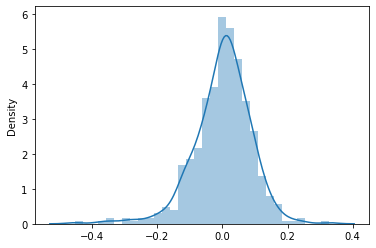

In [553]:
y_train_pred = lr6.predict(X_train_sm6) #predicts the y values for train dataset for given X values

res = y_train - y_train_pred 

#plotting the residuals pattern
sns.distplot(res)

The distribution of residuals is centered around 0 with normal distribution, so assumptions are validated.

# **Step 7: Predictions and Model Evaluation**

#### **Predictions**

In [554]:
num_var = ['temp','hum','windspeed','cnt']

#we only need to transform here as it is on test dataset. So there is no to fit, which is why we don't use fit_transform()
df_test[num_var] = scaler.transform(df_test[num_var])

In [555]:
#create X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [556]:
#keeping only the variables that the model was trained
X_test = X_test[col_6]
X_test.head()

,yr,workingday,temp,windspeed,spring,summer,winter,lightrain,misty,December,January,July,November,September,Monday
184,0,0,0.831783,0.084219,0,0,0,0,1,0,0,1,0,0,0
535,1,1,0.901354,0.153728,0,1,0,0,0,0,0,0,0,0,0
299,0,1,0.511964,0.334206,0,0,1,0,1,0,0,0,0,0,0
221,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0,0
152,0,1,0.817246,0.537414,0,1,0,0,0,0,0,0,0,0,0


In [557]:
X_test_sm = sm.add_constant(X_test)

#make predictions
y_test_pred = lr6.predict(X_test_sm)

#### **Evaluation**

In [558]:
#import library
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_test_pred)

0.8168681962672555

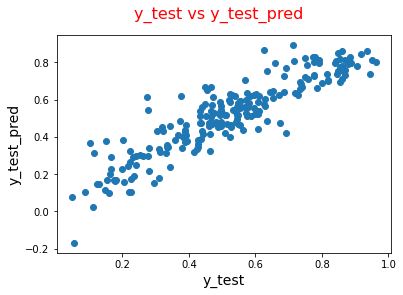

In [559]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
#add labels
fig.suptitle('y_test vs y_test_pred', fontsize=16, color='red')               
plt.xlabel('y_test', fontsize=14)                          
plt.ylabel('y_test_pred', fontsize=14)    
plt.show()

**R2 score for the test dataset is 0.817 and that for train dataset from above is 0.844, which means the model has a good predictive power.**

**Also, from the plot, we can see that the predictions are very similar to that of test dataset.**

**Equation of the model:**

cnt = 0.1985 + 0.2348×yr + 0.4354×temp + 0.0547xworkingday - 0.1609xwindspeed  - 0.0713×spring  + 0.0354×summer + 0.0903×winter  - 0.2969×lightrain - 0.0818×misty  - 0.0467×december - 0.0526×january -  0.0466×july - 0.0447×november + 0.0652×september + 0.0670×monday



### **Model Interpretation**

- The variables of the final model seems has p_value<0.05, so coefficients of all variables are statistically significant.

- R2 and Adjusted R2 are of similar values after removing the redundant and less significant variables.

- F-statistic p_value is nearly 0, so the fit is not just by chance.